In [1959]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px

## Load Data

In [1960]:
df = pd.read_csv(r"D:\Epsilon\Pandas & numpy\Mid Project\house_prices.csv", index_col= False)
df.head()

Index                                              Title  \
0      0  1 BHK Ready to Occupy Flat for sale in Srushti...   
1      1  2 BHK Ready to Occupy Flat for sale in Dosti V...   
2      2  2 BHK Ready to Occupy Flat for sale in Sunrise...   
3      3        1 BHK Ready to Occupy Flat for sale Kasheli   
4      4  2 BHK Ready to Occupy Flat for sale in TenX Ha...   

                                         Description Amount(in rupees)  \
0  Bhiwandi, Thane has an attractive 1 BHK Flat f...           42 Lac    
1  One can find this stunning 2 BHK flat for sale...           98 Lac    
2  Up for immediate sale is a 2 BHK apartment in ...          1.40 Cr    
3  This beautiful 1 BHK Flat is available for sal...           25 Lac    
4  This lovely 2 BHK Flat in Pokhran Road, Thane ...          1.60 Cr    

   Price (in rupees) location Carpet Area         Status         Floor  \
0             6000.0    thane    500 sqft  Ready to Move  10 out of 11   
1            13799.0    thane    473 sqft  Ready to Move   3 out of 22   
2            17500.0    thane    779 sqft  Ready to Move  10 out of 29   
3                NaN    thane    530 sqft  Ready to Move    1 out of 3   
4            18824.0    thane    635 sqft  Ready to Move  20 out of 42   

  Transaction  ... facing             overlooking  \
0      Resale  ...    NaN                     NaN   
1      Resale  ...   East             Garden/Park   
2      Resale  ...   East             Garden/Park   
3      Resale  ...    NaN                     NaN   
4      Resale  ...   West  Garden/Park, Main Road   

                               Society Bathroom Balcony Car Parking  \
0  Srushti Siddhi Mangal Murti Complex        1       2         NaN   
1                          Dosti Vihar        2     NaN      1 Open   
2                 Sunrise by Kalpataru        2     NaN   1 Covered   
3                                  NaN        1       1         NaN   
4          TenX Habitat Raymond Realty        2     NaN   1 Covered   

              Ownership Super Area Dimensions  Plot Area  
0                   NaN        NaN        NaN        NaN  
1              Freehold        NaN        NaN        NaN  
2              Freehold        NaN        NaN        NaN  
3                   NaN        NaN        NaN        NaN  
4  Co-operative Society        NaN        NaN        NaN  

[5 rows x 21 columns]

In [1961]:
df.shape

(187531, 21)

## Data Exploration

In [1962]:
df.duplicated().sum()

np.int64(0)

In [1963]:
df.describe()

Index  Price (in rupees)  Dimensions  Plot Area
count  187531.000000       1.698660e+05         0.0        0.0
mean    93765.000000       7.583772e+03         NaN        NaN
std     54135.681003       2.724171e+04         NaN        NaN
min         0.000000       0.000000e+00         NaN        NaN
25%     46882.500000       4.297000e+03         NaN        NaN
50%     93765.000000       6.034000e+03         NaN        NaN
75%    140647.500000       9.450000e+03         NaN        NaN
max    187530.000000       6.700000e+06         NaN        NaN

In [1964]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187531 entries, 0 to 187530
Data columns (total 21 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Index              187531 non-null  int64  
 1   Title              187531 non-null  object 
 2   Description        184508 non-null  object 
 3   Amount(in rupees)  187531 non-null  object 
 4   Price (in rupees)  169866 non-null  float64
 5   location           187531 non-null  object 
 6   Carpet Area        106858 non-null  object 
 7   Status             186916 non-null  object 
 8   Floor              180454 non-null  object 
 9   Transaction        187448 non-null  object 
 10  Furnishing         184634 non-null  object 
 11  facing             117298 non-null  object 
 12  overlooking        106095 non-null  object 
 13  Society            77853 non-null   object 
 14  Bathroom           186703 non-null  object 
 15  Balcony            138596 non-null  object 
 16  Ca

In [1965]:
df.isna().sum()

Index                     0
Title                     0
Description            3023
Amount(in rupees)         0
Price (in rupees)     17665
location                  0
Carpet Area           80673
Status                  615
Floor                  7077
Transaction              83
Furnishing             2897
facing                70233
overlooking           81436
Society              109678
Bathroom                828
Balcony               48935
Car Parking          103357
Ownership             65517
Super Area           107685
Dimensions           187531
Plot Area            187531
dtype: int64

In [1966]:
for each in df.columns:

    print(each, df[each].nunique())
    

Index 187531
Title 32446
Description 65634
Amount(in rupees) 1561
Price (in rupees) 10958
location 81
Carpet Area 2758
Status 1
Floor 947
Transaction 4
Furnishing 3
facing 8
overlooking 19
Society 10376
Bathroom 11
Balcony 11
Car Parking 229
Ownership 4
Super Area 2976
Dimensions 0
Plot Area 0


## Drop unnecessary columns

In [1967]:
# these columns are either empty columns or columns with one unique value like Status
df.drop(columns=["Index","Dimensions","Plot Area", "Status"], inplace= True)
df.shape

(187531, 17)

In [1968]:
df.duplicated().sum()

np.int64(119339)

In [1969]:
df.drop_duplicates(inplace = True, ignore_index=True)
df.shape[0]

68192

In [1970]:
df.columns

Index(['Title', 'Description', 'Amount(in rupees)', 'Price (in rupees)',
       'location', 'Carpet Area', 'Floor', 'Transaction', 'Furnishing',
       'facing', 'overlooking', 'Society', 'Bathroom', 'Balcony',
       'Car Parking', 'Ownership', 'Super Area'],
      dtype='object')

## Percantage of missing value in each column

In [1971]:
low_mv = []   # List of Low missing value columns
medim_mv = []  # List of Medium missing value columns
high_mv = []   # List of2 High missing value columns

for each in df.columns:
    cal = (df[each].isna().sum()/df.shape[0])*100
    print(each , "\n")
    print(cal, "\n")
    print("***************************\n")
    if cal < 5:
        low_mv.append(each)
    elif 5 < cal < 40:
        medim_mv.append(each)
    else:
        high_mv.append(each)
print("low missing value columns  " ,low_mv,"\n medium missing value columns" ,medim_mv,
      "\n high missing value columns",high_mv)

Title 

0.0 

***************************

Description 

3.2525809479117784 

***************************

Amount(in rupees) 

0.0 

***************************

Price (in rupees) 

8.643242609103707 

***************************

location 

0.0 

***************************

Carpet Area 

44.165004692632564 

***************************

Floor 

3.8347606757390897 

***************************

Transaction 

0.11438291881745659 

***************************

Furnishing 

1.8917175035194744 

***************************

facing 

39.30079774753637 

***************************

overlooking 

43.31153214453308 

***************************

Society 

56.92749882684186 

***************************

Bathroom 

0.6906968559361802 

***************************

Balcony 

27.949026278742373 

***************************

Car Parking 

57.67392069450962 

***************************

Ownership 

36.55560769591741 

***************************

Super Area 

56.01683481933365 

***************

## Droping the high missing value columns

In [1972]:
# removing the carpet area from the high missing value due it's importance
high_mv.pop(0)
high_mv

['overlooking', 'Society', 'Car Parking', 'Super Area']

In [1973]:
df.drop(columns = high_mv, inplace = True)


In [1974]:
df.shape

(68192, 13)

In [1975]:
df.duplicated().sum()

np.int64(10)

# Drop the low missing value columns' row

In [1976]:
df.dropna(subset=low_mv,axis = 0,inplace = True)
df = df.reset_index(drop = True)
df.tail(10)



Title  \
62797     4 BHK Ready to Occupy Flat for sale Nagla Road   
62798  3 BHK Ready to Occupy Flat for sale in GHB Spl...   
62799  5 BHK Ready to Occupy Flat for sale in Orvis G...   
62800  3 BHK Ready to Occupy Flat for sale in Sushma ...   
62801  3 BHK Ready to Occupy Flat for sale in Peer Mu...   
62802  3 BHK Ready to Occupy Flat for sale in Bollywo...   
62803  3 BHK Ready to Occupy Flat for sale in Sushma ...   
62804  3 BHK Ready to Occupy Flat for sale in Bollywo...   
62805  2 BHK Ready to Occupy Flat for sale in Friends...   
62806  3 BHK Ready to Occupy Flat for sale in Affinit...   

                                             Description Amount(in rupees)  \
62797  Nagla Road, Zirakpur has an appealing 4 BHK fl...          1.18 Cr    
62798  Up for immediate sale is a 3 BHK apartment in ...           80 Lac    
62799  This magnificent 5 BHK Flat is available for s...          1.19 Cr    
62800  One can find this stunning 3 BHK flat for sale...         69.6 Lac    
62801  Have a look at this immaculate 3 BHK flat for ...         44.9 Lac    
62802  This magnificent 3 BHK Flat is available for s...           63 Lac    
62803  Have a look at this immaculate 3 BHK flat for ...           55 Lac    
62804  Gazipur, Zirakpur has an appealing 3 BHK flat ...           76 Lac    
62805  Up for immediate sale is a 2 BHK apartment in ...           30 Lac    
62806  This exquisite 3 BHK Flat is offered for sale ...          1.18 Cr    

       Price (in rupees)  location Carpet Area        Floor   Transaction  \
62797             5816.0  zirakpur         NaN  2 out of 11        Resale   
62798             4040.0  zirakpur   1200 sqft   3 out of 3        Resale   
62799             4547.0  zirakpur   1705 sqft  5 out of 10        Resale   
62800             5135.0  zirakpur    895 sqft   5 out of 8        Resale   
62801             3904.0  zirakpur   1050 sqft   1 out of 3  New Property   
62802             3225.0  zirakpur         NaN   2 out of 4  New Property   
62803             3274.0  zirakpur         NaN   4 out of 6        Resale   
62804             4343.0  zirakpur   1250 sqft   1 out of 3        Resale   
62805             4231.0  zirakpur         NaN   2 out of 2        Resale   
62806             6162.0  zirakpur         NaN  5 out of 13        Resale   

           Furnishing        facing Bathroom Balcony Ownership  
62797     Unfurnished           NaN        4       4  Freehold  
62798  Semi-Furnished          East        3       3  Freehold  
62799  Semi-Furnished  North - East        5       3  Freehold  
62800  Semi-Furnished  North - East        3       2  Freehold  
62801     Unfurnished  North - East        3       2  Freehold  
62802  Semi-Furnished          East        3       3  Freehold  
62803     Unfurnished  North - East        3     NaN       NaN  
62804       Furnished          East        3       2  Freehold  
62805  Semi-Furnished           NaN        2     NaN       NaN  
62806  Semi-Furnished  North - East        4       4  Freehold

In [1977]:
63487/df.shape[0]

1.010826818666709

# Converting some columns to float

## 1-Converting "Amount" column from string to float

In [1978]:
def convert (x):
    if "Lac" in x:
        return float(x.replace("Lac",""))*100000
    elif "Cr" in x: 
        return float(x.replace("Cr","")) * 10000000
    elif x == "Call for Price":
        return 0
    else:
        return x
        
df['Amount(in rupees)'] = df["Amount(in rupees)"].apply(convert)



In [1979]:
def convert_p(x):
    if x == "unknown":
        return None
    else:
        return float(x)

In [1980]:
df["Price (in rupees)"] = df["Price (in rupees)"].apply(convert_p)

In [1981]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62807 entries, 0 to 62806
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Title              62807 non-null  object 
 1   Description        62807 non-null  object 
 2   Amount(in rupees)  62807 non-null  float64
 3   Price (in rupees)  57396 non-null  float64
 4   location           62807 non-null  object 
 5   Carpet Area        37134 non-null  object 
 6   Floor              62807 non-null  object 
 7   Transaction        62807 non-null  object 
 8   Furnishing         62807 non-null  object 
 9   facing             40621 non-null  object 
 10  Bathroom           62807 non-null  object 
 11  Balcony            48189 non-null  object 
 12  Ownership          42353 non-null  object 
dtypes: float64(2), object(11)
memory usage: 6.2+ MB


In [1982]:
df.head()

Title  \
0  1 BHK Ready to Occupy Flat for sale in Srushti...   
1  2 BHK Ready to Occupy Flat for sale in Dosti V...   
2  2 BHK Ready to Occupy Flat for sale in Sunrise...   
3        1 BHK Ready to Occupy Flat for sale Kasheli   
4  2 BHK Ready to Occupy Flat for sale in TenX Ha...   

                                         Description  Amount(in rupees)  \
0  Bhiwandi, Thane has an attractive 1 BHK Flat f...          4200000.0   
1  One can find this stunning 2 BHK flat for sale...          9800000.0   
2  Up for immediate sale is a 2 BHK apartment in ...         14000000.0   
3  This beautiful 1 BHK Flat is available for sal...          2500000.0   
4  This lovely 2 BHK Flat in Pokhran Road, Thane ...         16000000.0   

   Price (in rupees) location Carpet Area         Floor Transaction  \
0             6000.0    thane    500 sqft  10 out of 11      Resale   
1            13799.0    thane    473 sqft   3 out of 22      Resale   
2            17500.0    thane    779 sqft  10 out of 29      Resale   
3                NaN    thane    530 sqft    1 out of 3      Resale   
4            18824.0    thane    635 sqft  20 out of 42      Resale   

       Furnishing facing Bathroom Balcony             Ownership  
0     Unfurnished    NaN        1       2                   NaN  
1  Semi-Furnished   East        2     NaN              Freehold  
2     Unfurnished   East        2     NaN              Freehold  
3     Unfurnished    NaN        1       1                   NaN  
4     Unfurnished   West        2     NaN  Co-operative Society

In [1983]:
df.drop(df[df["Amount(in rupees)"] < 1].index, axis = 0, inplace= True)
df.shape
df.tail(10)

Title  \
62797     4 BHK Ready to Occupy Flat for sale Nagla Road   
62798  3 BHK Ready to Occupy Flat for sale in GHB Spl...   
62799  5 BHK Ready to Occupy Flat for sale in Orvis G...   
62800  3 BHK Ready to Occupy Flat for sale in Sushma ...   
62801  3 BHK Ready to Occupy Flat for sale in Peer Mu...   
62802  3 BHK Ready to Occupy Flat for sale in Bollywo...   
62803  3 BHK Ready to Occupy Flat for sale in Sushma ...   
62804  3 BHK Ready to Occupy Flat for sale in Bollywo...   
62805  2 BHK Ready to Occupy Flat for sale in Friends...   
62806  3 BHK Ready to Occupy Flat for sale in Affinit...   

                                             Description  Amount(in rupees)  \
62797  Nagla Road, Zirakpur has an appealing 4 BHK fl...         11800000.0   
62798  Up for immediate sale is a 3 BHK apartment in ...          8000000.0   
62799  This magnificent 5 BHK Flat is available for s...         11900000.0   
62800  One can find this stunning 3 BHK flat for sale...          6960000.0   
62801  Have a look at this immaculate 3 BHK flat for ...          4490000.0   
62802  This magnificent 3 BHK Flat is available for s...          6300000.0   
62803  Have a look at this immaculate 3 BHK flat for ...          5500000.0   
62804  Gazipur, Zirakpur has an appealing 3 BHK flat ...          7600000.0   
62805  Up for immediate sale is a 2 BHK apartment in ...          3000000.0   
62806  This exquisite 3 BHK Flat is offered for sale ...         11800000.0   

       Price (in rupees)  location Carpet Area        Floor   Transaction  \
62797             5816.0  zirakpur         NaN  2 out of 11        Resale   
62798             4040.0  zirakpur   1200 sqft   3 out of 3        Resale   
62799             4547.0  zirakpur   1705 sqft  5 out of 10        Resale   
62800             5135.0  zirakpur    895 sqft   5 out of 8        Resale   
62801             3904.0  zirakpur   1050 sqft   1 out of 3  New Property   
62802             3225.0  zirakpur         NaN   2 out of 4  New Property   
62803             3274.0  zirakpur         NaN   4 out of 6        Resale   
62804             4343.0  zirakpur   1250 sqft   1 out of 3        Resale   
62805             4231.0  zirakpur         NaN   2 out of 2        Resale   
62806             6162.0  zirakpur         NaN  5 out of 13        Resale   

           Furnishing        facing Bathroom Balcony Ownership  
62797     Unfurnished           NaN        4       4  Freehold  
62798  Semi-Furnished          East        3       3  Freehold  
62799  Semi-Furnished  North - East        5       3  Freehold  
62800  Semi-Furnished  North - East        3       2  Freehold  
62801     Unfurnished  North - East        3       2  Freehold  
62802  Semi-Furnished          East        3       3  Freehold  
62803     Unfurnished  North - East        3     NaN       NaN  
62804       Furnished          East        3       2  Freehold  
62805  Semi-Furnished           NaN        2     NaN       NaN  
62806  Semi-Furnished  North - East        4       4  Freehold

## 2-Convert "Carpet Area" from object to float

In [1984]:
def CarpetArea (x):
    if type(x) == float:
        return (x)
    elif "sqft" in x:
        return float(x.replace("sqft",""))
        
    

df["Carpet Area"]=df["Carpet Area"].apply(CarpetArea)


    


In [1985]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 60168 entries, 0 to 62806
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Title              60168 non-null  object 
 1   Description        60168 non-null  object 
 2   Amount(in rupees)  60168 non-null  float64
 3   Price (in rupees)  57396 non-null  float64
 4   location           60168 non-null  object 
 5   Carpet Area        34294 non-null  float64
 6   Floor              60168 non-null  object 
 7   Transaction        60168 non-null  object 
 8   Furnishing         60168 non-null  object 
 9   facing             39396 non-null  object 
 10  Bathroom           60168 non-null  object 
 11  Balcony            46443 non-null  object 
 12  Ownership          41026 non-null  object 
dtypes: float64(3), object(10)
memory usage: 6.4+ MB


In [1986]:
(df["Carpet Area"].isna().sum()/df.shape[0])*100

np.float64(43.002925142933115)

In [1987]:
df["Bathroom"].value_counts()

Bathroom
2       30622
3       17649
1        5956
4        4518
5        1182
6         165
7          26
> 10       25
8          10
10          8
9           7
Name: count, dtype: int64

In [1988]:
df["Balcony"].value_counts()

Balcony
2       17862
1       14691
3        9722
4        3296
5         701
6         120
7          13
8          13
10         12
> 10       11
9           2
Name: count, dtype: int64

## 3- Convert "Bathroom" to Float

In [1989]:
def Bathroom(x):
    if type(x) == float:
        return x
    elif x == "> 10":
        return 10.1
    else:
        return int(x)
df["Bathroom"] = df["Bathroom"].apply(Bathroom)

## 4- Convert Balcony to float

In [1990]:
def Bal(x):
    if type(x) == float:
        return x
    elif x == "> 10":
        return 10.1
    else:
        return int(x)
    
df["Balcony"] = df["Balcony"].apply(Bal)

# Feature Engineering

In [1991]:
def floorno(x):
    x = x.split()
    
    if x[0] == "Ground":
        return (0)
    elif x[0] == "Upper":
        return (-1)
    elif x[0] == "Lower":
        return (-2)
    else:
        return int(x[0])
    
df["Floor No"] = df.Floor.apply(floorno)


In [1992]:
def Building_no_of_floors(x):
    x = x.split()
    if len(x) == 1:
        return (None)
    else:
        return int(x[-1])
    
df["Total Floors"] = df.Floor.apply(Building_no_of_floors)


In [1993]:
# now i can drop floor column
df = df.drop("Floor", axis=1).reset_index(drop = True)
df

Title  \
0      1 BHK Ready to Occupy Flat for sale in Srushti...   
1      2 BHK Ready to Occupy Flat for sale in Dosti V...   
2      2 BHK Ready to Occupy Flat for sale in Sunrise...   
3            1 BHK Ready to Occupy Flat for sale Kasheli   
4      2 BHK Ready to Occupy Flat for sale in TenX Ha...   
...                                                  ...   
60163  3 BHK Ready to Occupy Flat for sale in Bollywo...   
60164  3 BHK Ready to Occupy Flat for sale in Sushma ...   
60165  3 BHK Ready to Occupy Flat for sale in Bollywo...   
60166  2 BHK Ready to Occupy Flat for sale in Friends...   
60167  3 BHK Ready to Occupy Flat for sale in Affinit...   

                                             Description  Amount(in rupees)  \
0      Bhiwandi, Thane has an attractive 1 BHK Flat f...          4200000.0   
1      One can find this stunning 2 BHK flat for sale...          9800000.0   
2      Up for immediate sale is a 2 BHK apartment in ...         14000000.0   
3      This beautiful 1 BHK Flat is available for sal...          2500000.0   
4      This lovely 2 BHK Flat in Pokhran Road, Thane ...         16000000.0   
...                                                  ...                ...   
60163  This magnificent 3 BHK Flat is available for s...          6300000.0   
60164  Have a look at this immaculate 3 BHK flat for ...          5500000.0   
60165  Gazipur, Zirakpur has an appealing 3 BHK flat ...          7600000.0   
60166  Up for immediate sale is a 2 BHK apartment in ...          3000000.0   
60167  This exquisite 3 BHK Flat is offered for sale ...         11800000.0   

       Price (in rupees)  location  Carpet Area   Transaction      Furnishing  \
0                 6000.0     thane        500.0        Resale     Unfurnished   
1                13799.0     thane        473.0        Resale  Semi-Furnished   
2                17500.0     thane        779.0        Resale     Unfurnished   
3                    NaN     thane        530.0        Resale     Unfurnished   
4                18824.0     thane        635.0        Resale     Unfurnished   
...                  ...       ...          ...           ...             ...   
60163             3225.0  zirakpur          NaN  New Property  Semi-Furnished   
60164             3274.0  zirakpur          NaN        Resale     Unfurnished   
60165             4343.0  zirakpur       1250.0        Resale       Furnished   
60166             4231.0  zirakpur          NaN        Resale  Semi-Furnished   
60167             6162.0  zirakpur          NaN        Resale  Semi-Furnished   

             facing  Bathroom  Balcony             Ownership  Floor No  \
0               NaN       1.0      2.0                   NaN        10   
1              East       2.0      NaN              Freehold         3   
2              East       2.0      NaN              Freehold        10   
3               NaN       1.0      1.0                   NaN         1   
4              West       2.0      NaN  Co-operative Society        20   
...             ...       ...      ...                   ...       ...   
60163          East       3.0      3.0              Freehold         2   
60164  North - East       3.0      NaN                   NaN         4   
60165          East       3.0      2.0              Freehold         1   
60166           NaN       2.0      NaN                   NaN         2   
60167  North - East       4.0      4.0              Freehold         5   

       Total Floors  
0              11.0  
1              22.0  
2              29.0  
3               3.0  
4              42.0  
...             ...  
60163           4.0  
60164           6.0  
60165           3.0  
60166           2.0  
60167          13.0  

[60168 rows x 14 columns]

In [1994]:
df.duplicated().sum()

c:\Users\20111\anaconda3\envs\test\Lib\site-packages\IPython\core\displayhook.py:281: UserWarning:

Output cache limit (currently 1000 entries) hit.
Flushing oldest 200 entries.



np.int64(1)

In [1995]:
df.drop_duplicates(inplace= True, ignore_index= True)

In [1996]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60167 entries, 0 to 60166
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Title              60167 non-null  object 
 1   Description        60167 non-null  object 
 2   Amount(in rupees)  60167 non-null  float64
 3   Price (in rupees)  57395 non-null  float64
 4   location           60167 non-null  object 
 5   Carpet Area        34293 non-null  float64
 6   Transaction        60167 non-null  object 
 7   Furnishing         60167 non-null  object 
 8   facing             39395 non-null  object 
 9   Bathroom           60167 non-null  float64
 10  Balcony            46442 non-null  float64
 11  Ownership          41025 non-null  object 
 12  Floor No           60167 non-null  int64  
 13  Total Floors       60128 non-null  float64
dtypes: float64(6), int64(1), object(7)
memory usage: 6.4+ MB


In [1997]:
# for each in df.columns:
#     px.histogram(df, x = each, title= each).show()

In [1998]:
df.head()

Title  \
0  1 BHK Ready to Occupy Flat for sale in Srushti...   
1  2 BHK Ready to Occupy Flat for sale in Dosti V...   
2  2 BHK Ready to Occupy Flat for sale in Sunrise...   
3        1 BHK Ready to Occupy Flat for sale Kasheli   
4  2 BHK Ready to Occupy Flat for sale in TenX Ha...   

                                         Description  Amount(in rupees)  \
0  Bhiwandi, Thane has an attractive 1 BHK Flat f...          4200000.0   
1  One can find this stunning 2 BHK flat for sale...          9800000.0   
2  Up for immediate sale is a 2 BHK apartment in ...         14000000.0   
3  This beautiful 1 BHK Flat is available for sal...          2500000.0   
4  This lovely 2 BHK Flat in Pokhran Road, Thane ...         16000000.0   

   Price (in rupees) location  Carpet Area Transaction      Furnishing facing  \
0             6000.0    thane        500.0      Resale     Unfurnished    NaN   
1            13799.0    thane        473.0      Resale  Semi-Furnished   East   
2            17500.0    thane        779.0      Resale     Unfurnished   East   
3                NaN    thane        530.0      Resale     Unfurnished    NaN   
4            18824.0    thane        635.0      Resale     Unfurnished   West   

   Bathroom  Balcony             Ownership  Floor No  Total Floors  
0       1.0      2.0                   NaN        10          11.0  
1       2.0      NaN              Freehold         3          22.0  
2       2.0      NaN              Freehold        10          29.0  
3       1.0      1.0                   NaN         1           3.0  
4       2.0      NaN  Co-operative Society        20          42.0

# Data Analysis

In [1999]:
df.head(5)

Title  \
0  1 BHK Ready to Occupy Flat for sale in Srushti...   
1  2 BHK Ready to Occupy Flat for sale in Dosti V...   
2  2 BHK Ready to Occupy Flat for sale in Sunrise...   
3        1 BHK Ready to Occupy Flat for sale Kasheli   
4  2 BHK Ready to Occupy Flat for sale in TenX Ha...   

                                         Description  Amount(in rupees)  \
0  Bhiwandi, Thane has an attractive 1 BHK Flat f...          4200000.0   
1  One can find this stunning 2 BHK flat for sale...          9800000.0   
2  Up for immediate sale is a 2 BHK apartment in ...         14000000.0   
3  This beautiful 1 BHK Flat is available for sal...          2500000.0   
4  This lovely 2 BHK Flat in Pokhran Road, Thane ...         16000000.0   

   Price (in rupees) location  Carpet Area Transaction      Furnishing facing  \
0             6000.0    thane        500.0      Resale     Unfurnished    NaN   
1            13799.0    thane        473.0      Resale  Semi-Furnished   East   
2            17500.0    thane        779.0      Resale     Unfurnished   East   
3                NaN    thane        530.0      Resale     Unfurnished    NaN   
4            18824.0    thane        635.0      Resale     Unfurnished   West   

   Bathroom  Balcony             Ownership  Floor No  Total Floors  
0       1.0      2.0                   NaN        10          11.0  
1       2.0      NaN              Freehold         3          22.0  
2       2.0      NaN              Freehold        10          29.0  
3       1.0      1.0                   NaN         1           3.0  
4       2.0      NaN  Co-operative Society        20          42.0

## What is the average price for each location?

In [2000]:
# df1 = df.groupby("location")["Amount(in rupees)"].mean().sort_values(ascending= False)
# re = px.bar(df1 , color_discrete_sequence=["red"])
# re.show()

## Relation between area and price

<Axes: xlabel='Carpet Area', ylabel='Amount(in rupees)'>

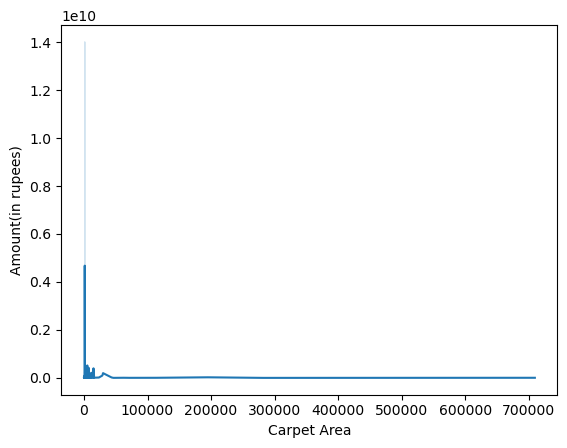

In [2001]:
df2 = df.groupby("Carpet Area")["Amount(in rupees)"].max().sort_values(ascending= True)
df2
sns.lineplot(x = "Carpet Area", y = "Amount(in rupees)", data = df)
#sns.lineplot(df2)



In [2002]:
# px.scatter( df["Amount(in rupees)"],df["Carpet Area"])

In [2003]:
df["Carpet Area"].unique()

array([ 500.,  473.,  779., ..., 1526., 1634.,  136.], shape=(2311,))

In [2004]:
# px.bar(df, x = "Carpet Area",y = "Amount(in rupees)", 
       
#        color_discrete_sequence= ["red"])


## Does the number of bathrooms affect the price?

In [2005]:
# df3 = df.groupby("Bathroom")["Amount(in rupees)"].median().sort_values(ascending= True)

# sns.lineplot(x = "Bathroom", y = "Amount(in rupees)", data = df)


## Does the number of balcony affect the price

In [2006]:
# df4 = df.groupby("Balcony")["Amount(in rupees)"].median().sort_values(ascending= True)

# sns.lineplot(x = "Balcony", y = "Amount(in rupees)", data = df)

In [2007]:
df["Ownership"].nunique()

4

## Ownership perentage

In [2008]:
# px.pie(df, names= "Ownership")

## Does th ownership affect the price

In [2009]:
# df4 = df.groupby("Ownership")["Amount(in rupees)"].count().sort_values()

# sns.lineplot(x = "Ownership", y = "Amount(in rupees)", data = df)

In [2010]:
# df["facing"].nunique()
# px.pie(df, names = "facing")

## Does Facing affect price?

In [2011]:
# px.bar(df, x = "facing",y = "Amount(in rupees)", 
       
#        color_discrete_sequence= ["red"])

In [2012]:
# df["Transaction"].nunique()
# px.pie(df, names = "Transaction")

## Relation between Transaction and Price

In [2013]:
# px.bar(df, x = "Transaction",y = "Amount(in rupees)", 
#        title = "Relation between Transaction and price",
#        labels = {"Transaction":"Price"},
#        color_discrete_sequence= ["red"])

## Does the floor number affect price?

In [2014]:
# sns.lineplot(x = "Floor No", y = "Amount(in rupees)", data = df)

In [2015]:
df5 = df.groupby(["Carpet Area","location"])["Amount(in rupees)"].max().sort_values(ascending= True)
df[df["Carpet Area"] == df["Carpet Area"].max()]["location"]


40686    guwahati
Name: location, dtype: object

In [2016]:
df["location"].nunique()

81

## Does the Furnishing affect price?

In [2017]:
dfx = df.groupby("Furnishing")["Amount(in rupees)"].median().sort_values()

#px.bar(dfx, color_discrete_sequence=["red"])


## The cost of maximum area in each city

In [2018]:
df6 = df.groupby("location")["Carpet Area"].idxmax().sort_values(ascending=False)
df6
df.loc[df6, ["location", "Carpet Area", "Amount(in rupees)"]]

location  Carpet Area  Amount(in rupees)
59724       zirakpur       3060.0          6700000.0
58690      vrindavan       1300.0         13000000.0
57266  visakhapatnam       7000.0         70000000.0
56687     vijayawada       3300.0         20000000.0
56401       varanasi      10000.0          1300000.0
...              ...          ...                ...
2677       ahmedabad       8000.0        110000000.0
1771          mumbai       7400.0        420000000.0
1351          nagpur       2300.0         25100000.0
922      navi-mumbai       2043.0         42500000.0
783            thane       2350.0         72500000.0

[81 rows x 3 columns]

In [2019]:
df[df["Amount(in rupees)"] == df['Amount(in rupees)'].max()]
df[df["Floor No"] == -1]
new = df.groupby(["Floor No","facing"])["Amount(in rupees)"].mean().sort_values().reset_index()
new

Floor No        facing  Amount(in rupees)
0          -2  South - East          3300000.0
1          26  North - West          5160000.0
2          32  North - West          5500000.0
3          19   South -West          5600000.0
4          -2         South          5672500.0
..        ...           ...                ...
286        70          East        220000000.0
287        40          East        245250000.0
288        46          East        300000000.0
289        63          East        368000000.0
290        60          East        400000000.0

[291 rows x 3 columns]

In [2020]:
#px.box(data_frame= df, x= 'Furnishing', y= 'Amount(in rupees)', color_discrete_sequence=['red'])

In [2021]:
df[df["Ownership"]=="Leasehold"]

Title  \
149           2 BHK Ready to Occupy Flat for sale Kalyan   
194    1 BHK Ready to Occupy Flat for sale in Lodha L...   
249        1 BHK Ready to Occupy Flat for sale Ambernath   
413     1 BHK Ready to Occupy Flat for sale Panch Pakhdi   
836    1 BHK Ready to Occupy Flat for sale Dombivli West   
...                                                  ...   
58060  3 BHK Ready to Occupy Flat for sale Seethammad...   
58087    3 BHK Ready to Occupy Flat for sale Madhurawada   
58775        3 BHK Ready to Occupy Flat for sale Dhakoli   
59180  3 BHK Ready to Occupy Flat for sale in Spangle...   
59840  2 BHK Ready to Occupy Flat for sale in Affinit...   

                                             Description  Amount(in rupees)  \
149    2 BHK flat available for sale in Thane in the ...          6000000.0   
194    This magnificent 1 BHK Flat is available for s...          3600000.0   
249    This gorgeous 1 BHK Flat is available for sale...          3000000.0   
413    Have a look at this immaculate 1 BHK flat for ...          9500000.0   
836    Dombivli West, Thane has an attractive 1 BHK F...          5500000.0   
...                                                  ...                ...   
58060  Discover this immaculate 3 BHK flat for sale a...         15000000.0   
58087  This beautiful 3 BHK Flat is available for sal...          5290000.0   
58775  Have a look at this immaculate 3 BHK flat for ...          7200000.0   
59180  One can find this stunning 3 BHK flat for sale...          5500000.0   
59840  This magnificent 2 BHK Flat is available for s...          6800000.0   

       Price (in rupees)       location  Carpet Area   Transaction  \
149               7143.0          thane          NaN        Resale   
194                  NaN          thane        510.0  New Property   
249               4478.0          thane        475.0        Resale   
413              18591.0          thane          NaN        Resale   
836               6875.0          thane        600.0        Resale   
...                  ...            ...          ...           ...   
58060             8000.0  visakhapatnam       1875.0        Resale   
58087             4069.0  visakhapatnam       1300.0        Resale   
58775             3945.0       zirakpur          NaN        Resale   
59180             4701.0       zirakpur          NaN        Resale   
59840             5436.0       zirakpur        880.0        Resale   

           Furnishing        facing  Bathroom  Balcony  Ownership  Floor No  \
149    Semi-Furnished         South       1.0      NaN  Leasehold         5   
194    Semi-Furnished           NaN       1.0      1.0  Leasehold        11   
249         Furnished          East       1.0      2.0  Leasehold         2   
413         Furnished          East       1.0      NaN  Leasehold         7   
836       Unfurnished  North - East       2.0      NaN  Leasehold         2   
...               ...           ...       ...      ...        ...       ...   
58060  Semi-Furnished         North       3.0      2.0  Leasehold         4   
58087     Unfurnished         South       2.0      2.0  Leasehold         5   
58775  Semi-Furnished  North - East       3.0      NaN  Leasehold        11   
59180     Unfurnished  North - East       4.0      3.0  Leasehold         6   
59840       Furnished          East       2.0      3.0  Leasehold        10   

       Total Floors  
149             6.0  
194            18.0  
249             4.0  
413            15.0  
836             4.0  
...             ...  
58060           5.0  
58087           5.0  
58775          13.0  
59180           6.0  
59840          13.0  

[2954 rows x 14 columns]

# Save Cleaned data

In [2022]:
df.to_csv("House_Pricing_Cleaned")

In [2023]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60167 entries, 0 to 60166
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Title              60167 non-null  object 
 1   Description        60167 non-null  object 
 2   Amount(in rupees)  60167 non-null  float64
 3   Price (in rupees)  57395 non-null  float64
 4   location           60167 non-null  object 
 5   Carpet Area        34293 non-null  float64
 6   Transaction        60167 non-null  object 
 7   Furnishing         60167 non-null  object 
 8   facing             39395 non-null  object 
 9   Bathroom           60167 non-null  float64
 10  Balcony            46442 non-null  float64
 11  Ownership          41025 non-null  object 
 12  Floor No           60167 non-null  int64  
 13  Total Floors       60128 non-null  float64
dtypes: float64(6), int64(1), object(7)
memory usage: 6.4+ MB


# Deployment

In [2024]:
medim_mv

['Price (in rupees)', 'facing', 'Balcony', 'Ownership']

# Data preprocessing

In [2025]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60167 entries, 0 to 60166
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Title              60167 non-null  object 
 1   Description        60167 non-null  object 
 2   Amount(in rupees)  60167 non-null  float64
 3   Price (in rupees)  57395 non-null  float64
 4   location           60167 non-null  object 
 5   Carpet Area        34293 non-null  float64
 6   Transaction        60167 non-null  object 
 7   Furnishing         60167 non-null  object 
 8   facing             39395 non-null  object 
 9   Bathroom           60167 non-null  float64
 10  Balcony            46442 non-null  float64
 11  Ownership          41025 non-null  object 
 12  Floor No           60167 non-null  int64  
 13  Total Floors       60128 non-null  float64
dtypes: float64(6), int64(1), object(7)
memory usage: 6.4+ MB


## Handling Missing values

In [2026]:
df.isna().sum()

Title                    0
Description              0
Amount(in rupees)        0
Price (in rupees)     2772
location                 0
Carpet Area          25874
Transaction              0
Furnishing               0
facing               20772
Bathroom                 0
Balcony              13725
Ownership            19142
Floor No                 0
Total Floors            39
dtype: int64

In [2027]:
df.shape[0]

60167

In [2028]:

df["Ownership"] = df["Ownership"].fillna("unknown")

In [2029]:
df.isna().sum()

Title                    0
Description              0
Amount(in rupees)        0
Price (in rupees)     2772
location                 0
Carpet Area          25874
Transaction              0
Furnishing               0
facing               20772
Bathroom                 0
Balcony              13725
Ownership                0
Floor No                 0
Total Floors            39
dtype: int64

In [2030]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60167 entries, 0 to 60166
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Title              60167 non-null  object 
 1   Description        60167 non-null  object 
 2   Amount(in rupees)  60167 non-null  float64
 3   Price (in rupees)  57395 non-null  float64
 4   location           60167 non-null  object 
 5   Carpet Area        34293 non-null  float64
 6   Transaction        60167 non-null  object 
 7   Furnishing         60167 non-null  object 
 8   facing             39395 non-null  object 
 9   Bathroom           60167 non-null  float64
 10  Balcony            46442 non-null  float64
 11  Ownership          60167 non-null  object 
 12  Floor No           60167 non-null  int64  
 13  Total Floors       60128 non-null  float64
dtypes: float64(6), int64(1), object(7)
memory usage: 6.4+ MB


In [2031]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")
df["Carpet Area"] = imputer.fit_transform(df[["Carpet Area"]])
df["Balcony"] = imputer.fit_transform(df[["Balcony"]])

imputer1 = SimpleImputer(strategy = "most_frequent")
imputed_values = imputer1.fit_transform(df["facing"].values.reshape(-1,1))
df["facing"] = imputed_values.reshape(-1)
df["facing"].isna().sum()



np.int64(0)

In [2032]:
df.isna().sum()

Title                   0
Description             0
Amount(in rupees)       0
Price (in rupees)    2772
location                0
Carpet Area             0
Transaction             0
Furnishing              0
facing                  0
Bathroom                0
Balcony                 0
Ownership               0
Floor No                0
Total Floors           39
dtype: int64

In [2033]:
imputer2 = SimpleImputer(strategy= "median")
df["Total Floors"] = imputer2.fit_transform(df[["Total Floors"]])

In [2034]:
df.isna().sum()

Title                   0
Description             0
Amount(in rupees)       0
Price (in rupees)    2772
location                0
Carpet Area             0
Transaction             0
Furnishing              0
facing                  0
Bathroom                0
Balcony                 0
Ownership               0
Floor No                0
Total Floors            0
dtype: int64

In [2035]:
from sklearn.impute import KNNImputer

knn = KNNImputer(n_neighbors=5)
df["Price (in rupees)"]=knn.fit_transform(df[["Price (in rupees)"]])

In [2036]:
df["Price (in rupees)"]
px.histogram(df, x = "Price (in rupees)")

In [2037]:
df.shape

(60167, 14)

## Handling outliers

In [2038]:
px.box(df, y= "Amount(in rupees)", color_discrete_sequence=["red"])

In [2039]:
from datasist.structdata import detect_outliers

outliers = detect_outliers(df, n = 0,features=["Amount(in rupees)"])
price_median = df["Amount(in rupees)"].median()
#df.loc[outliers,"Amount(in rupees)"] = price_median


In [2040]:
def detect_OL(dataframe, column, lower_thershold, upper_thershold):
    lowerFence = dataframe[column].quantile(lower_thershold)
    upperFence = dataframe[column].quantile(upper_thershold)
    outlier_indices = dataframe[(dataframe[column] >upperFence) | (dataframe[column] < lowerFence)][column].index
    return outlier_indices

In [2041]:
from sklearn.preprocessing import RobustScaler

scalar = RobustScaler()
df["Amount(in rupees)"] = scalar.fit_transform(df[["Amount(in rupees)"]])

In [2042]:
px.box(df, y= "Amount(in rupees)", color_discrete_sequence=["red"]).show()

## Drop the outliers in the Amount column

In [2043]:
Amount_outliers = detect_OL(df,"Amount(in rupees)", 0.01,0.99)
Amount_outliers

Index([   49,   316,   471,   515,   783,   811,   876,  1221,  1489,  1503,
       ...
       56329, 56401, 56719, 57266, 57914, 58429, 58662, 58666, 58918, 59885],
      dtype='int64', length=1157)

In [2044]:
#df.drop(Amount_outliers, axis = 0, inplace= True)

In [2045]:
#px.box(df, y= "Amount(in rupees)", color_discrete_sequence=["red"]).show()

## Carpet Area outliers

In [2046]:
px.box(df, y= "Carpet Area")

## Area outliers

In [2051]:
from sklearn.preprocessing import RobustScaler
scalar1 = RobustScaler()
df["Carpet Area"]=scalar1.fit_transform(df[["Carpet Area"]])

In [2052]:
px.box(df, y= "Carpet Area")

In [2047]:
# area_outliers = detect_OL(df, "Carpet Area", 0.01,0.99)
# area_outliers

In [2048]:
# df.drop(area_outliers, axis = 0, inplace = True)


In [2049]:
# px.box(df, y= "Carpet Area")

In [2050]:
df.shape

(60167, 14)

# Check Categorical Columns in Details

In [2055]:
cat_CL= df.select_dtypes(include="object").columns

In [2057]:
for col in cat_CL:
    print(col,"\n")
    print(df[col].nunique(),"\n")
    print(df[col].unique(),"\n")
    print("***************")

Title 

29095 

['1 BHK Ready to Occupy Flat for sale in Srushti Siddhi Mangal Murti Complex Bhiwandi'
 '2 BHK Ready to Occupy Flat for sale in Dosti Vihar Pokhran Road'
 '2 BHK Ready to Occupy Flat for sale in Sunrise by Kalpataru Kolshet Road'
 ... '3 BHK Ready to Occupy Flat for sale in Savitry Enclave VIP Road'
 '4 BHK Ready to Occupy Flat for sale Nagla Road'
 '2 BHK Ready to Occupy Flat for sale in Friends Enclave Kishanpura'] 

***************
Description 

59863 

['Bhiwandi, Thane has an attractive 1 BHK Flat for sale. The property is ideally located in a strategic location in Srushti Siddhi Mangal Murti Complex township. This flat for resale is a choice property. This apartment ready to move in the Bhiwandi is available for an attractive price of\xa0INR 42 Lac. You will find it unfurnished.'
 'One can find this stunning 2 BHK flat for sale in Pokhran Road, Thane. It enjoys an excellent location within the\xa0Dosti Vihar. This flat for resale is a choice property. This ready t

In [2078]:
df_nominal = df.select_dtypes(include= 'object').drop(["Title","Description","location"],axis = 1)
df_nominal
df_E = df[["location"]]
df_E

location
0         thane
1         thane
2         thane
3         thane
4         thane
...         ...
60162  zirakpur
60163  zirakpur
60164  zirakpur
60165  zirakpur
60166  zirakpur

[60167 rows x 1 columns]

# Data preprocessing

In [2070]:
from sklearn.preprocessing import OneHotEncoder

oneHE = OneHotEncoder(drop = "first", sparse_output= False)
one_arr = oneHE.fit_transform(df_nominal)

one_arr


array([[0., 0., 1., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.]], shape=(60167, 16))

In [2074]:
one_df= pd.DataFrame(one_arr, columns=oneHE.get_feature_names_out())
one_df

Transaction_Other  Transaction_Rent/Lease  Transaction_Resale  \
0                    0.0                     0.0                 1.0   
1                    0.0                     0.0                 1.0   
2                    0.0                     0.0                 1.0   
3                    0.0                     0.0                 1.0   
4                    0.0                     0.0                 1.0   
...                  ...                     ...                 ...   
60162                0.0                     0.0                 0.0   
60163                0.0                     0.0                 1.0   
60164                0.0                     0.0                 1.0   
60165                0.0                     0.0                 1.0   
60166                0.0                     0.0                 1.0   

       Furnishing_Semi-Furnished  Furnishing_Unfurnished  facing_North  \
0                            0.0                     1.0           0.0   
1                            1.0                     0.0           0.0   
2                            0.0                     1.0           0.0   
3                            0.0                     1.0           0.0   
4                            0.0                     1.0           0.0   
...                          ...                     ...           ...   
60162                        1.0                     0.0           0.0   
60163                        0.0                     1.0           0.0   
60164                        0.0                     0.0           0.0   
60165                        1.0                     0.0           0.0   
60166                        1.0                     0.0           0.0   

       facing_North - East  facing_North - West  facing_South  \
0                      0.0                  0.0           0.0   
1                      0.0                  0.0           0.0   
2                      0.0                  0.0           0.0   
3                      0.0                  0.0           0.0   
4                      0.0                  0.0           0.0   
...                    ...                  ...           ...   
60162                  0.0                  0.0           0.0   
60163                  1.0                  0.0           0.0   
60164                  0.0                  0.0           0.0   
60165                  0.0                  0.0           0.0   
60166                  1.0                  0.0           0.0   

       facing_South - East  facing_South -West  facing_West  \
0                      0.0                 0.0          0.0   
1                      0.0                 0.0          0.0   
2                      0.0                 0.0          0.0   
3                      0.0                 0.0          0.0   
4                      0.0                 0.0          1.0   
...                    ...                 ...          ...   
60162                  0.0                 0.0          0.0   
60163                  0.0                 0.0          0.0   
60164                  0.0                 0.0          0.0   
60165                  0.0                 0.0          0.0   
60166                  0.0                 0.0          0.0   

       Ownership_Freehold  Ownership_Leasehold  Ownership_Power Of Attorney  \
0                     0.0                  0.0                          0.0   
1                     1.0                  0.0                          0.0   
2                     1.0                  0.0                          0.0   
3                     0.0                  0.0                          0.0   
4                     0.0                  0.0                          0.0   
...                   ...                  ...                          ...   
60162                 1.0                  0.0                          0.0   
60163                 0.0                  0.0                          0.0   
6016

In [2080]:
from category_encoders import BinaryEncoder

be = BinaryEncoder()

be_df = be.fit_transform(df_E)
be_df

location_0  location_1  location_2  location_3  location_4  location_5  \
0               0           0           0           0           0           0   
1               0           0           0           0           0           0   
2               0           0           0           0           0           0   
3               0           0           0           0           0           0   
4               0           0           0           0           0           0   
...           ...         ...         ...         ...         ...         ...   
60162           1           0           1           0           0           0   
60163           1           0           1           0           0           0   
60164           1           0           1           0           0           0   
60165           1           0           1           0           0           0   
60166           1           0           1           0           0           0   

       location_6  
0               1  
1               1  
2               1  
3               1  
4               1  
...           ...  
60162           1  
60163           1  
60164           1  
60165           1  
60166           1  

[60167 rows x 7 columns]

In [2086]:
df = pd.concat([df, one_df]).drop(df_nominal,axis=1)
df.head()

Title  \
0  1 BHK Ready to Occupy Flat for sale in Srushti...   
1  2 BHK Ready to Occupy Flat for sale in Dosti V...   
2  2 BHK Ready to Occupy Flat for sale in Sunrise...   
3        1 BHK Ready to Occupy Flat for sale Kasheli   
4  2 BHK Ready to Occupy Flat for sale in TenX Ha...   

                                         Description  Amount(in rupees)  \
0  Bhiwandi, Thane has an attractive 1 BHK Flat f...          -0.333333   
1  One can find this stunning 2 BHK flat for sale...           0.478261   
2  Up for immediate sale is a 2 BHK apartment in ...           1.086957   
3  This beautiful 1 BHK Flat is available for sal...          -0.579710   
4  This lovely 2 BHK Flat in Pokhran Road, Thane ...           1.376812   

   Price (in rupees) location  Carpet Area  Bathroom  Balcony  Floor No  \
0         6000.00000    thane    -3.821656       1.0      2.0      10.0   
1        13799.00000    thane    -3.993631       2.0      2.0       3.0   
2        17500.00000    thane    -2.044586       2.0      2.0      10.0   
3         6850.05551    thane    -3.630573       1.0      1.0       1.0   
4        18824.00000    thane    -2.961783       2.0      2.0      20.0   

   Total Floors  ...  facing_North - East  facing_North - West  facing_South  \
0          11.0  ...                  NaN                  NaN           NaN   
1          22.0  ...                  NaN                  NaN           NaN   
2          29.0  ...                  NaN                  NaN           NaN   
3           3.0  ...                  NaN                  NaN           NaN   
4          42.0  ...                  NaN                  NaN           NaN   

   facing_South - East  facing_South -West  facing_West  Ownership_Freehold  \
0                  NaN                 NaN          NaN                 NaN   
1                  NaN                 NaN          NaN                 NaN   
2                  NaN                 NaN          NaN                 NaN   
3                  NaN                 NaN          NaN                 NaN   
4                  NaN                 NaN          NaN                 NaN   

   Ownership_Leasehold  Ownership_Power Of Attorney  Ownership_unknown  
0                  NaN                          NaN                NaN  
1                  NaN                          NaN                NaN  
2                  NaN                          NaN                NaN  
3                  NaN                          NaN                NaN  
4                  NaN                          NaN                NaN  

[5 rows x 26 columns]

In [2087]:
df = pd.concat([df,be_df]).drop(["location","Title","Description"],axis = 1)
df.head()

Amount(in rupees)  Price (in rupees)  Carpet Area  Bathroom  Balcony  \
0          -0.333333         6000.00000    -3.821656       1.0      2.0   
1           0.478261        13799.00000    -3.993631       2.0      2.0   
2           1.086957        17500.00000    -2.044586       2.0      2.0   
3          -0.579710         6850.05551    -3.630573       1.0      1.0   
4           1.376812        18824.00000    -2.961783       2.0      2.0   

   Floor No  Total Floors  Transaction_Other  Transaction_Rent/Lease  \
0      10.0          11.0                NaN                     NaN   
1       3.0          22.0                NaN                     NaN   
2      10.0          29.0                NaN                     NaN   
3       1.0           3.0                NaN                     NaN   
4      20.0          42.0                NaN                     NaN   

   Transaction_Resale  ...  Ownership_Leasehold  Ownership_Power Of Attorney  \
0                 NaN  ...                  NaN                          NaN   
1                 NaN  ...                  NaN                          NaN   
2                 NaN  ...                  NaN                          NaN   
3                 NaN  ...                  NaN                          NaN   
4                 NaN  ...                  NaN                          NaN   

   Ownership_unknown  location_0  location_1  location_2  location_3  \
0                NaN         NaN         NaN         NaN         NaN   
1                NaN         NaN         NaN         NaN         NaN   
2                NaN         NaN         NaN         NaN         NaN   
3                NaN         NaN         NaN         NaN         NaN   
4                NaN         NaN         NaN         NaN         NaN   

   location_4  location_5  location_6  
0         NaN         NaN         NaN  
1         NaN         NaN         NaN  
2         NaN         NaN         NaN  
3         NaN         NaN         NaN  
4         NaN         NaN         NaN  

[5 rows x 30 columns]